<a href="https://colab.research.google.com/github/ConradBitt/repositorio_monografia/blob/main/Cobweb_plot_Diagrama_Bifurcacoes_Espectro_Lyapunov_TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição

Esse notebook foi criado por [Conrado F. Bittencourt](https://gist.github.com/ConradBitt) com o objetivo de iterar os mapas, gráficos de Cobweb, construir diagramas debifurcação e calcular o espectro de Lyapunov para o TCC.

In [ ]:
# Versão Ubuntu
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.5 LTS
Release:	18.04
Codename:	bionic


# Importações

Os módulos python que serão utilizados neste projeto são:

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.ticker as tkr
import numpy as np
import seaborn as sns
from decimal import *
import math
import string


#import locale
#locale.setlocale(locale.LC_NUMERIC, 'en_EN')


sns.set_context('talk')
plt.style.use('bmh')

# Definindo funções auxiliares (python)


In [ ]:
# função do formatador leva o rótulo do tick e a posição do tick 
def func(x, pos):
    s = str(np.round(x,2))
    ind = s.index('.')
    return s[:ind] + ',' + s[ind+1:]   # trocando ponto por vírgula

formatador = tkr.FuncFormatter(func)  # criando formatador


Nesta etapa vou criar algumas funções para realizar os cálculos e as exibições gráficas.

## Função para iterar mapa

In [ ]:
def itera_mapa(f, x0, n):
    """
    Itera o mapa f(x) começando em x0 por n instantes de tempo.
    - f: função lambda a ser iterada.
    - x_0: condição inicial 
    - Precisão: 
    Retorna um numpy.array com n+1 valores x[0], ..., x[n].
    """
    x = np.zeros(n+1)
    x[0] = x0
    xt = Decimal(x0)
    for t in range(n):
        xt = f(xt)
        x[t+1] = xt
    return x

## Função para exibir Cobweb plot

In [ ]:
def cobweb_plot(f, x_0, n_iteracoes, range_x, figsize, titulo='', legenda=False, labels_axis = ('x_t','x_{t+1}')):
    """
    Exibe Cobweb plot
    - f: funcao lambda a ser iterada
    - x_0: condição inicial
    - n_iteracoes: quantidade de passos (iteracoes)
    - eq_latex: string com equação em LaTeX
    - range_x: tupla com limite inferior e superior de x
    - figsize: tupla com comprimento X altura (em centimentros)

    return: (X,Y), figura
    """
    cm = 1/2.54
    figsize = (figsize[0]*cm, figsize[1]*cm)
    quantidade_iteracoes = n_iteracoes

    pontos = []
    pontos.append((x_0, f(x_0)))

    for iteracao in range(quantidade_iteracoes):
        x, y = pontos[-1]
        y = f(x)
        pontos.append((x,y))
        x = y 
        pontos.append((x,y))

    vetor_resultados = np.array(pontos).T
    X, Y = vetor_resultados

    axis_min, axis_max = range_x

    eixo = np.linspace(axis_min, axis_max, 100)
    f_x = np.array([f(x) for x in eixo])
    
    fig, ax = plt.subplots(figsize = figsize)
    ax.set_xlim(min(eixo), max(eixo))
    ax.set_ylim(min(eixo), max(eixo))
    ax.set_xlabel(f'${labels_axis[0]}$', fontsize=20)
    ax.set_ylabel(f'${labels_axis[1]}$', fontsize=20)

    ax.plot(eixo, eixo, linewidth=1, linestyle='--')
    ax.plot(eixo, f_x, color='green', label=r'$f(x)$')
    ax.hlines(y = 0, xmin=min(eixo), xmax = max(eixo), color='black', alpha=0.5)

    ax.plot(X[1:],Y[1:], color='blue', linewidth=0.5, label='Trajetória')
    ax.vlines(x_0, 0.0, Y[1], color='red', label='C.I.')
    ax.set_title(f'{titulo}', pad=20, fontsize=20)
    
    if legenda:
      ax.legend(loc='upper left')

    #sns.histplot(np.array(Y), bins=50, ax=ax[1])
    #ax[1].set_title(r'Distribuição de $x_{n+1}$ ao longo das iterações', pad=20, fontsize=20)
    #ax[1].set_xlabel(r'$x_{n+1}$', fontsize=18)
    #ax[1].set_ylabel(r'Frequência', fontsize=18);

    # Formatando os pontos pra vírgula
    ax.yaxis.set_major_formatter(formatador)
    ax.xaxis.set_major_formatter(formatador)
    
    return vetor_resultados, fig

## Função para exibir Diagrama de Bifurcação

In [ ]:
import random

def bifurcacao_plot(f, xs_0, n_iteracoes, r, titulo, figsize, linhas_verticais=False, labels_axis = ('r','x_{t+1}')):
    """
    Exibe diagrama de bifurcacao
    - f(x,r): função lambda a ser iterada (função lambda)
    - xs_0: lista de condições iniciais (CI's)(array)
    - n_iteracoes: quantidade de iterações (int)
    - r: espaço de parâmetros r (array)
    - titulo: string com título, $LaTeX$
    - figsize: tupla com comprimento X altura (em centimentros)

    return: (X_n, r), figura
    """
    cm = 1/2.54
    figsize = (figsize[0]*cm, figsize[1]*cm)

    resultados_bif = []
    for parametro_controle in r:
        x_0 = random.choice(xs_0) # Seleciona um valor das CI's
        x = itera_mapa(lambda x: f(x, Decimal(parametro_controle)),
                        Decimal(x_0), n_iteracoes)
        xn = x[-1]
        resultados_bif.append((xn, parametro_controle))

    resultados_bif = np.array(resultados_bif).T
    X_n_bif, espaco_r_bif = resultados_bif

    fig, ax = plt.subplots(figsize = figsize)

    ax.scatter(espaco_r_bif, X_n_bif, s=0.2, c='black')
    if linhas_verticais:
      i=0
      cores = ['blue','green','orange','red']
      for ponto in linhas_verticais:
        ax.vlines(ponto, min(X_n_bif)-1, max(X_n_bif)+1, color=f'{cores[i]}', label=f'({(string.ascii_uppercase[i])}) ${labels_axis[0]}={str(ponto).replace(".",",")}$')
        i += 1


    ax.legend()
    ax.set_ylim(min(X_n_bif), max(X_n_bif))
    ax.set_xlim(min(espaco_r_bif), max(espaco_r_bif))

    ax.set_ylabel(f'${labels_axis[1]}$',fontsize=20, rotation=0)
    ax.set_xlabel(f'Parâmetro de controle ${labels_axis[0]}$',fontsize=20)
    ax.set_title(f'{titulo}',fontsize=20, pad=20)

    # Formatando os pontos pra vírgula
    ax.yaxis.set_major_formatter(formatador)
    ax.xaxis.set_major_formatter(formatador)

    return resultados_bif, fig


## Função para exibir Espectro de Lyapunov

In [ ]:
from scipy.misc import derivative
import string


def expectro_lyapunov_plot(f, x_0, n_iteracoes, r, titulo, figsize, linhas_verticais=False, labels_axis = ('r','\lambda_r')):
    """
    Exibe o expectro de lyapunov
    - f(x,r): função lambda que representa o mapa
    - x_0: condição inicial da trajetória
    - n_iteracoes: quantidade de iterações do mapa
    - r: array com os parâmetros de controle 
    - titulo: string com equação escrita em LaTeX
    - figsize: tupla com comprimento X altura (em centimentros)

    return: (exp_lyap, r), figura
    """
    cm = 1/2.54
    figsize = (figsize[0]*cm, figsize[1]*cm)

    resultados_exp_lyap = []

    for parametro_controle in r:
        
        treajetoria_1 = itera_mapa(lambda x: f(x, Decimal(parametro_controle)),
                                   Decimal(x_0), n_iteracoes)
        
        exp_lyapunov = np.mean(np.log(np.abs([derivative(lambda x: f(x, parametro_controle), k, dx=1e-6) for k in treajetoria_1])))

        resultados_exp_lyap.append((exp_lyapunov, parametro_controle))

    resultados_exp_lyap = np.array(resultados_exp_lyap).T
    X_n_exp_lyap, espaco_r_exp_lyap = resultados_exp_lyap

    fig, ax = plt.subplots(figsize = figsize)
    ax.set_ylim(-1,max(X_n_exp_lyap))
    ax.set_xlim(min(r), max(r))
    #fig.set_size_inches(10, 8)

    ax.scatter(espaco_r_exp_lyap, X_n_exp_lyap, s=0.2, c='black')
    #plt.hlines(y=0.0, xmin=min(r),xmax=max(r),color='black', linewidth=0.5)
    ax.set_ylabel(f'${labels_axis[1]}$',fontsize=20, rotation=0)
    ax.set_xlabel(f'Parâmetro de controle ${labels_axis[0]}$', fontsize=20)
    ax.set_title(f'{titulo}', pad=20, fontsize=20)

    if linhas_verticais:
      i=0
      cores = ['blue','green','orange','red']
      for ponto in linhas_verticais:
        ax.vlines(ponto, min(X_n_exp_lyap)-1, max(X_n_exp_lyap)+1, color=f'{cores[i]}', label=f'({(string.ascii_uppercase[i])}) ${labels_axis[0]}={str(ponto).replace(".",",")}$')
        i += 1

    ax.legend()
    
    # Formatando os pontos pra vírgula
    ax.yaxis.set_major_formatter(formatador)
    ax.xaxis.set_major_formatter(formatador)
  
    return resultados_exp_lyap, fig

## Logistico: $$x_{n+1} = rx_{n}(1-x_{n}), \text{ com } x_n \in [0,1] \text{ e } r \in [0,4]$$

In [ ]:
def mapa_logistico(x, r):
    x = float(x)
    r = float(r)
    return r * x *(1 - x) 

### Cobwebplot

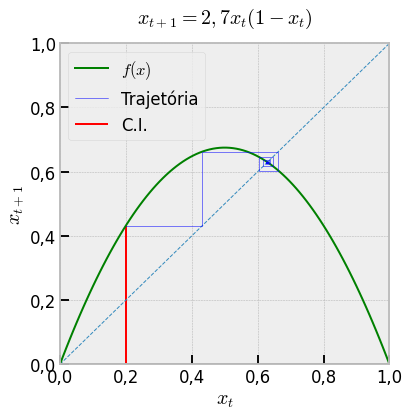

In [ ]:
cobweb_plot(f = lambda x: mapa_logistico(x, 2.7), x_0 = 0.2, 
            n_iteracoes = 250, range_x = (0,1),
            titulo = '$x_{t+1} = 2,7 x_t(1-x_t)$',
            legenda=True,
            figsize=(15,15));

#### Ponto Fixo

In [ ]:
x_27 = itera_mapa(lambda x: mapa_logistico(x, 2.7), 0.2, 250)
ponto_fixo_27 = x_27[-1]
ponto_fixo_27

0.6296296296296298

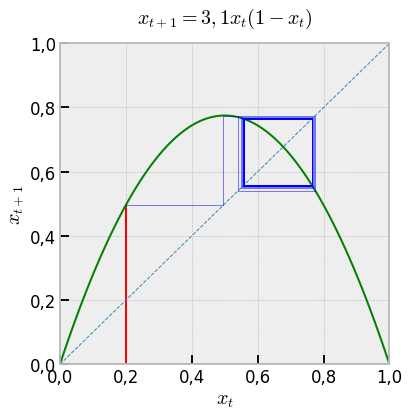

In [ ]:
cobweb_plot(f = lambda x: mapa_logistico(x, 3.1), x_0 = 0.2, 
            n_iteracoes = 250, range_x = (0,1),
            titulo = '$x_{t+1} = 3,1 x_t(1-x_t)$',          
            figsize=(15,15));

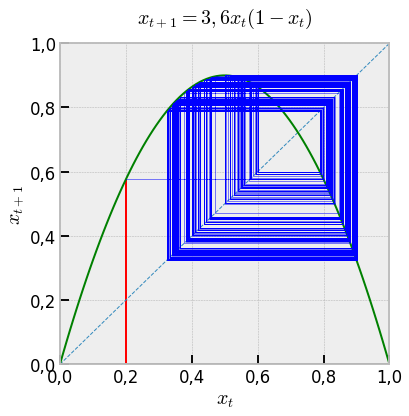

In [ ]:
cobweb_plot(f = lambda x: mapa_logistico(x, 3.6), x_0 = 0.2, 
            n_iteracoes = 250, range_x = (0,1),
            titulo = '$x_{t+1} = 3,6 x_t(1-x_t)$',          
            figsize=(15,15));

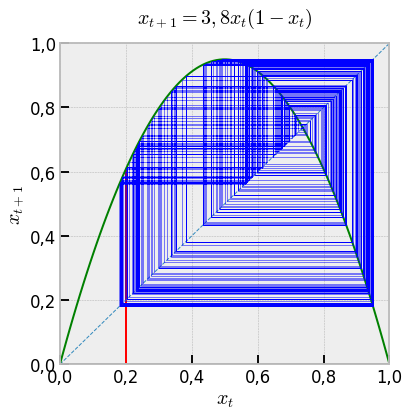

In [ ]:
cobweb_plot(f = lambda x: mapa_logistico(x, 3.8), x_0 = 0.2, 
            n_iteracoes = 250, range_x = (0,1),
            titulo = '$x_{t+1} = 3,8 x_t(1-x_t)$',          
            figsize=(15,15));


### Diagrama Bifurcação


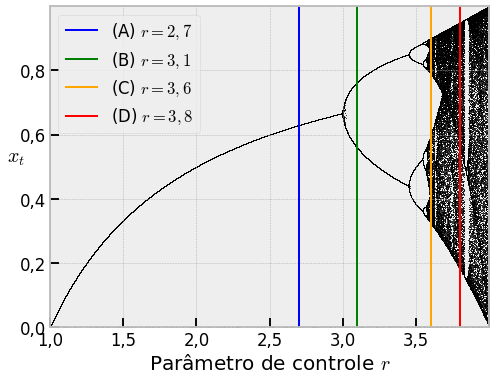

In [ ]:
bifurcacao_plot(
    f = mapa_logistico, xs_0 = np.linspace(0.1,1.,1000),
    n_iteracoes = 250, r = np.arange(1,4,0.00001),
    titulo='',
    figsize=(20,15),
    linhas_verticais = (2.7,3.1,3.6,3.8),
    labels_axis=('r','x_{t}')
    );


### Espectro de Lyapunov

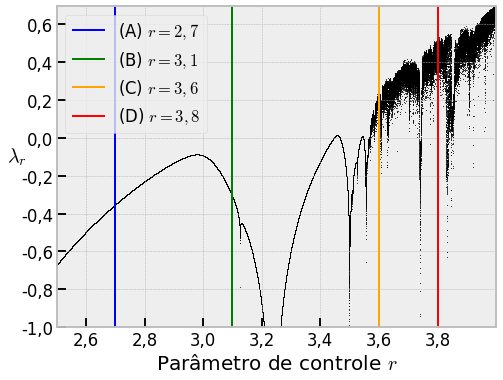

In [ ]:
expectro_lyapunov_plot(
    f = mapa_logistico, x_0 = 0.2, n_iteracoes = 50,
    r = np.arange(2.5,4,0.00001),
    titulo='',
    figsize=(20,15),
    linhas_verticais = (2.7,3.1,3.6,3.8),
    labels_axis=('r','\lambda_{r}')
    );

## Linear por partes



In [ ]:
from decimal import Decimal 
# parâmetros
p1 = -0.5
#l = 1.5
p2 = -2.4

# fuções lineares 


def linear_por_partes(x, l):
    x = float(x)
    l = float(l)
    
    f1 = lambda x : p1 * x + (p1 / l - 1) 
    f2 = lambda x : l * x 
    f3 = lambda x : p2 * x - (p2 / l - 1) 

    if -1 <= x < -1 / l:
        return f1(x)
    if -1 / l <= x < 1/l:
        return f2(x)
    if 1/l < x <= 1:
        return f3(x)

### Cobweb plot

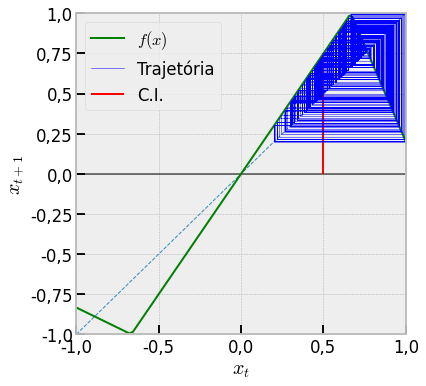

In [ ]:
cobweb_plot(f = lambda x : linear_por_partes(x, 1.5),
            x_0 = 0.5,
            n_iteracoes = 250,
            range_x = (-1,1),
            figsize=(15,15), titulo='',
            legenda=True);

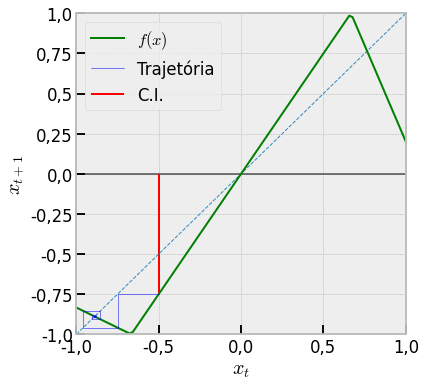

In [ ]:
cobweb_plot(f = lambda x : linear_por_partes(x, 1.5),
            x_0 = -0.5,
            n_iteracoes = 250,
            range_x = (-1,1),
            figsize=(15,15), titulo='',
            legenda=True);

#### Ponto Fixo

In [ ]:
x_linear_picewise = itera_mapa(lambda x: linear_por_partes(x, 1.5), -0.2, 250)
ponto_fixo_picewise = x_linear_picewise[-1]
ponto_fixo_picewise

-0.8888888888888888

### Diagrama de Bifurcação

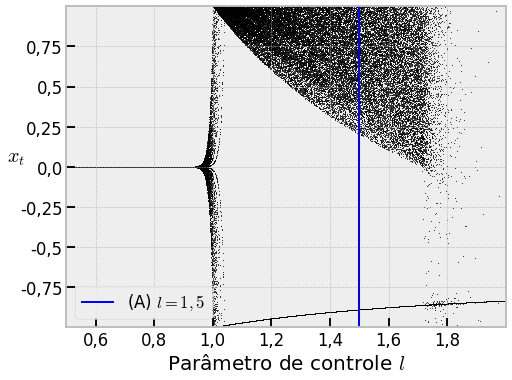

In [ ]:
bifurcacao_plot(f = linear_por_partes,
                xs_0 = np.linspace(-1,1.,50),
                n_iteracoes = 100,
                r = np.arange(0.5,2.,0.00001),
                titulo = '',
                figsize=(20,15),
                linhas_verticais= [1.5],
                labels_axis=('l','x_{t}')
                );


### Espectro de Lyapunov

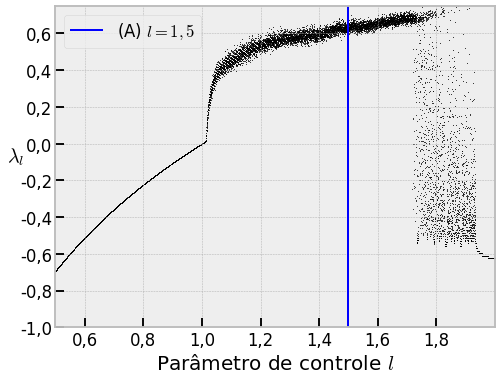

In [ ]:
expectro_lyapunov_plot(f = linear_por_partes,
                       x_0 = 0.25,
                       n_iteracoes = 100,
                       r = np.arange(0.5,2.,0.0001, dtype=np.float64),
                       titulo = '',
                       figsize=(20,15),
                       linhas_verticais= [1.5],
                       labels_axis=('l','\lambda_{l}')
                       );

                       